##  Iris data
A classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica.

Here we perform the statisitical analysis of the petal length measurements

Data Source: https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
#necessary imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data 
iris = pd.read_csv('dataset/iris.data', header=None)

In [4]:
#inspect the dataframe
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#set the columns names 
cols= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']
iris.columns = cols
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#check the values of Species column
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [7]:
#boolean indexing the petal length of Iris versicolor 
versicolor = iris.loc[iris['species'] =='Iris-versicolor']
versicolor_petal_length = versicolor.petal_length

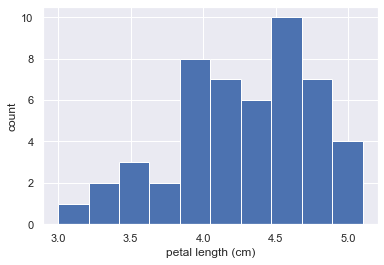

In [8]:
#plot the petal length of Iris versicolor 
sns.set()
_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

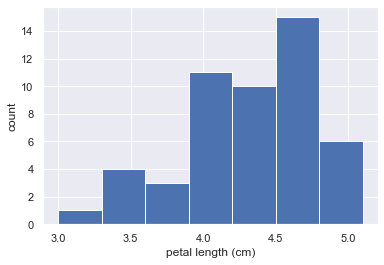

In [9]:
#set the bin based on the petal length considering the square root rule 
n_data = len(versicolor_petal_length)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

_ = plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

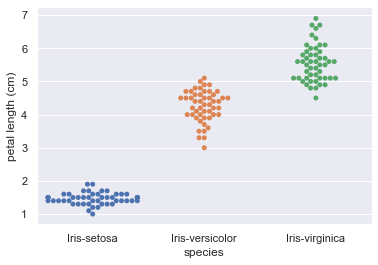

In [10]:
# histogram accounts for binning bias, so plot the data with swarm plots 
_ = sns.swarmplot(x='species', y='petal_length', data=iris)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

 I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.
 Swarm plots have an efficacy leading to overlapping edges on the plot with larger data

In [11]:

# ECDF as a solution 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    #number of data points 
    n = len(data)
    #x-data for ECDF
    x = np.sort(data)
    #y-data for the ECDF
    y = np.arange(1, n + 1) / n
    return x, y

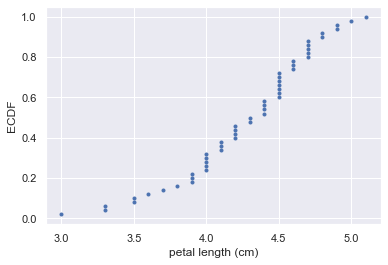

In [12]:
#compute the ecdf for the versicolor data 
x_vers, y_vers = ecdf(versicolor_petal_length)

#generate plot
_ = plt.plot(x_vers, y_vers, linestyle='none', marker='.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

In [13]:
#boolean indexing the setosa and virginica petal lengths
setosa = iris.loc[iris['species'] =='Iris-setosa']
virginica = iris.loc[iris['species'] =='Iris-virginica']

setosa_petal_length = setosa.petal_length
virginica_petal_length = virginica.petal_length

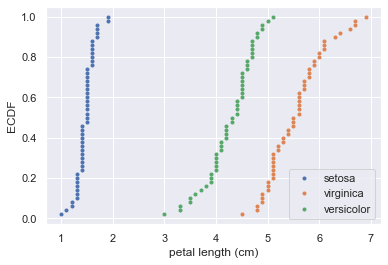

In [14]:
#compute ecdf for setosa and virginica data
x_set, y_set = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

#generate plots 
_ = plt.plot(x_set, y_set, linestyle='none', marker='.')

_ = plt.plot(x_virg, y_virg, linestyle='none', marker='.')

_ = plt.plot(x_vers, y_vers, linestyle='none', marker='.')

# Annotate the plot
plt.legend(('setosa', 'virginica', 'versicolor'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

Setosa is much shorter with less absolute variations in petal length 

In [15]:
# Quantitative Exploratory Analysis
vers_mean_length = np.mean(versicolor_petal_length)
print('Versicolor: ',vers_mean_length,'cm')

Versicolor:  4.26 cm


In [16]:
# specify the array of percentiles 
percentiles = np.array([2.5, 25, 50, 75, 97.5])

#compute versicolor percentiles 
vers_ptiles = np.percentile(versicolor_petal_length, percentiles)

#print the percentiles 
print(vers_ptiles)

[3.3    4.     4.35   4.6    4.9775]


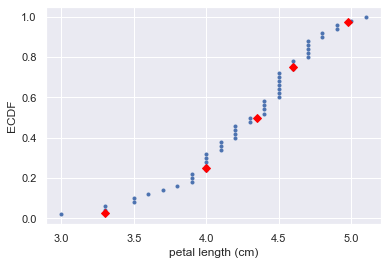

In [17]:
# comparing percentiles to ECDF 
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

#overlaying percentiles 
_ = plt.plot(vers_ptiles, percentiles/100, marker='D', color='red', linestyle='none')

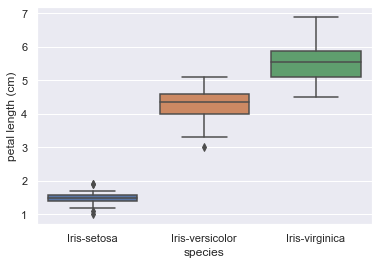

In [18]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species',y='petal_length', data=iris)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')



In [19]:
# variance and standard deviation 
variance_versi = np.var(versicolor_petal_length)
print('Variance:',variance_versi)

std_versi = np.std(versicolor_petal_length)
print('Standard Deviation:',std_versi)

Variance: 0.21640000000000012
Standard Deviation: 0.4651881339845204


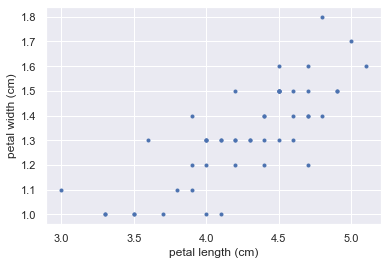

In [20]:
#corealtion 
versicolor_petal_width = versicolor.petal_width

_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

Longer petals tend to be wider, indeed we see a corealtion 

In [21]:
# compute the covariance matrix 
cov_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(cov_matrix)

#extract the petal lengths and widths 
cov_petal = cov_matrix[0, 1]

#print the petal lengths and widths 
print(cov_petal)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [22]:
# Pearson corealtion coefficient as it is easier to interpret 
def pearson_cor(x, y):
    """Compute pearson coefficient between two arrays"""
    #compute covariance matrix 
    corr_mat = np.corrcoef(x, y)
    #return entry [0,1]
    return corr_mat[0, 1]

#compute the pearson coefficient of versicolor petal lengths and widths
cor = pearson_cor(versicolor_petal_length, versicolor_petal_width)
print(cor)

0.7866680885228169


They are corelated 

In [23]:
#set the features and lables of the iris data 
X = iris.drop(['species'], axis=1).values
y = iris['species'].values


In [24]:
#import necessary modules 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [25]:
#split the data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
#initialize the Nearest Neigbor and Logistic Regression classifiers 
knn = KNeighborsClassifier(n_neighbors=3)
log_reg = LogisticRegression(random_state=1)

#scale the data to normalise the values (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
#list of classifiers
classifiers = [('Logistic Regression', log_reg), ('Nearest Neighbors', knn)]

#iterate over the predefined classifiers
for clf_name, clf in classifiers:
    #fit the model to the train data 
    clf.fit(X_train_scaled, y_train)
    
    #predict the test set 
    y_pred = clf.predict(X_test_scaled)
    
    #calculate the accuracy
    accuracy = accuracy_score(y_pred, y_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.911
Nearest Neighbors : 0.956


In [28]:
from sklearn.model_selection import GridSearchCV

#range of neighbors
n_neighbors = list(range(1,25))

#parameter grid with the range of neighbors 
param_grid = {'n_neighbors': n_neighbors}

#intialise the grid search to find the best hyperparameter
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

#fit the grid to the train data 
grid.fit(X_train_scaled, y_train)

#predict the test set 
y_pred = grid.predict(X_test_scaled)

In [29]:
#print the best estimator
print(grid.best_estimator_)

#print the best parameters
print(grid.best_params_)

#print the best score 
print('Best Score: %.4f'%grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
{'n_neighbors': 7}
Best Score: 0.9619
